In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch
from pathlib import Path

/home/clara/miniconda3/envs/pytorch-bootcamp/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Initialize TrOCR
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

# Use paddleOCR for text detection
from doctr.models import ocr_predictor
reader = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> 

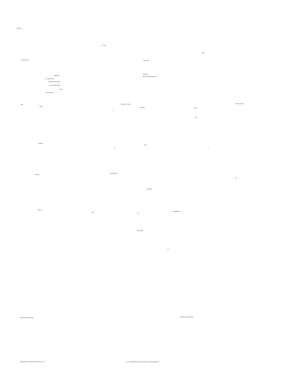

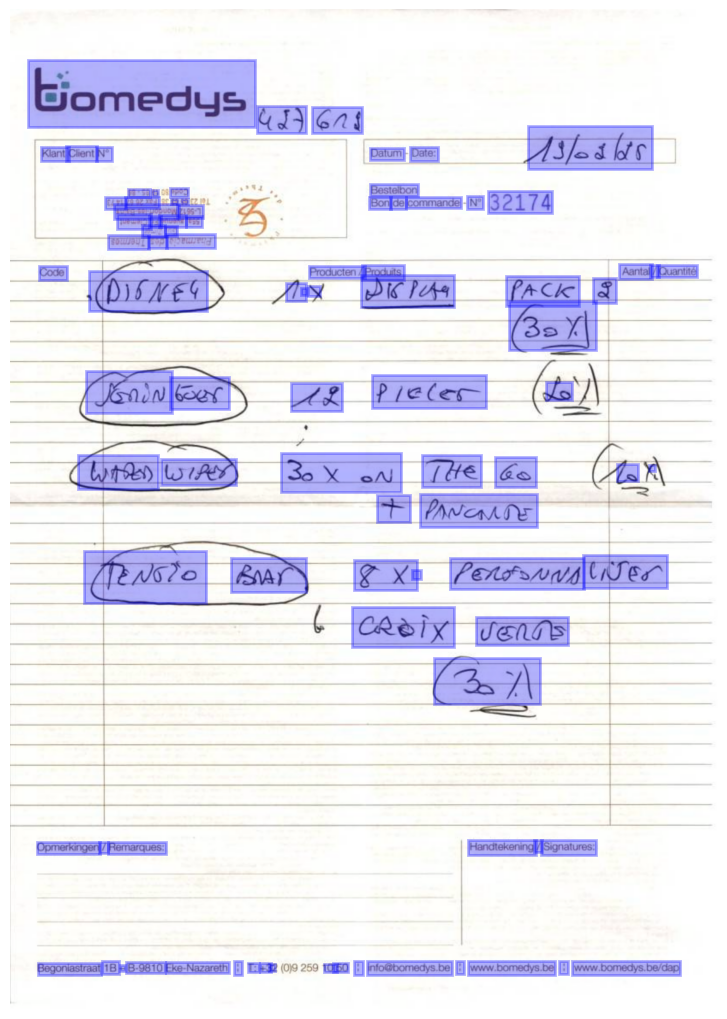

In [43]:
from doctr_flow import process_image
INPUT_FOLDER = Path("/home/clara/CodingProjects/order-form-extraction/images/")
OUTPUT_FOLDER = Path("/home/clara/CodingProjects/order-form-extraction/output/test_1")
image_path = INPUT_FOLDER / "Scan2025-02-19_184359_page_3.png"

result = process_image(image_path, OUTPUT_FOLDER, reader, model, processor)

In [44]:
text_objects = result["pages"][0]["blocks"][0]
for line in text_objects["lines"]:
    print(" ".join([word["value"] for word in line["words"]]))

biomedys
437 Gn8
Klant Client No
Datum Date:
1s3br
9858 a apoj
Bestelbon
ELTL 499274 89 9
Bon de commande No 32174
supeg-seryopuow 21991
queuao 4 ONUSAE ess
14Z fno
BouDsuI p seua
Code
Producten/ Produits
Aantal / Quantité
DEKES
- - y
DKGTCA9
PACK S
304
6noN ber
18
P/cles
o
W) WIRY
30XON THE 6o
16 C
+ PANCNOE
42N570
BAT
&x -
PErofsNN CES
CReix JERGs
13A
Opmerkingen / Remarques:
Handtekening / Signatures:
Begoniastraat 1B - B-9810 Eke-Nazareth : TS +3 32
10: 50 : info@bomedys.be : www.bomedys.be : www.bomedysbe-dap
